In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime 

#open the dataset
with open('houses_clean.csv',encoding='latin-1') as f:
    df = pd.read_csv(f)

In [10]:
df.columns

Index(['Unnamed: 0', 'house_type', 'address', 'region', 'area', 'sup_area',
       'rooms', 'land_area', 'monthly_fee', 'date_sold', 'broker',
       'price_change_pct', 'price', 'total_area', 'price_per_sqm',
       'price_per_tsqm', 'list_price', 'is_condo', 'year', 'month'],
      dtype='object')

In [11]:
def box(indep_var, dep_var):
    data = pd.concat([df[dep_var], df[indep_var]], axis=1)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.boxplot(x=indep_var, y=dep_var, data=data, ax=ax)
    plt.show()

In [12]:
def scatter(dep_var, indep_var):
    df.plot(kind='scatter', x=indep_var, y=dep_var, s=92, alpha=0.3)
    plt.show()

# Space

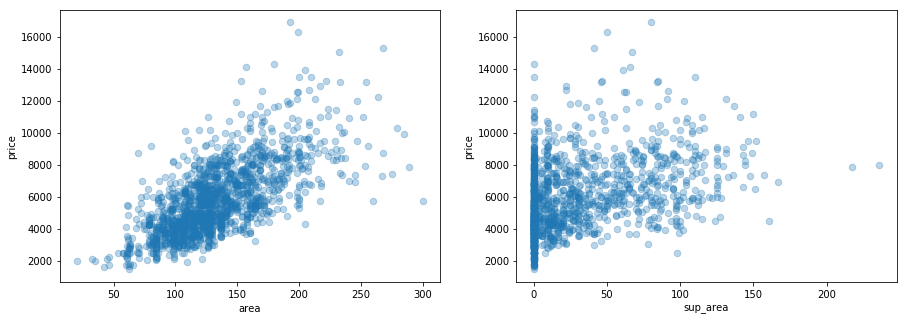

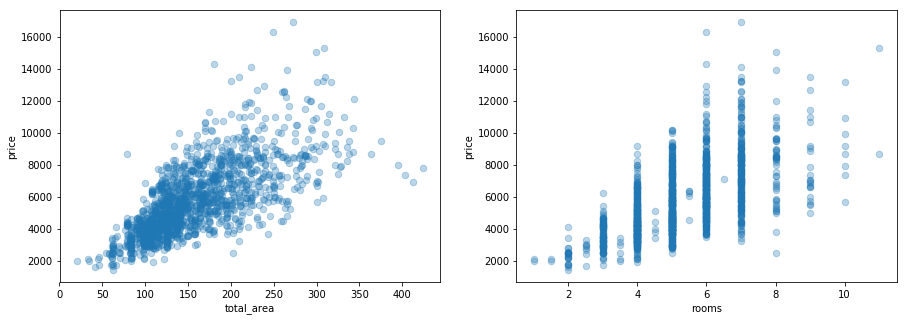

In [13]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,5))
df.plot(kind='scatter', x='area', y='price', s=42, alpha=0.3, ax=axis1)
df.plot(kind='scatter', x='sup_area', y='price', s=42, alpha=0.3, ax=axis2)
plt.show()
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,5))
df.plot(kind='scatter', x='total_area', y='price', s=42, alpha=0.3, ax=axis1)
df.plot(kind='scatter', x='rooms', y='price', s=42, alpha=0.3, ax=axis2)
plt.show()

# Land Area, Monthly Fee and Is_Condo

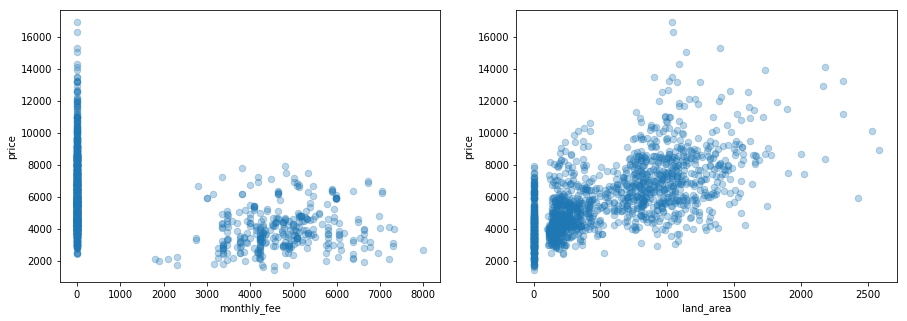

In [14]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,5))
df.plot(kind='scatter', x='monthly_fee', y='price', s=42, alpha=0.3, ax=axis1)
df.plot(kind='scatter', x='land_area', y='price', s=42, alpha=0.3, ax=axis2)
plt.show()

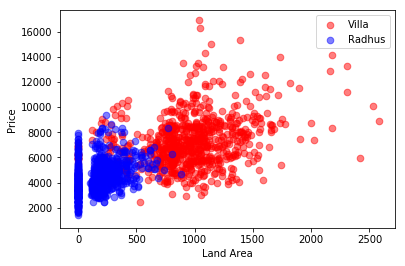

In [15]:
plt.scatter(df[df.house_type == 'Villa'].land_area, df[df.house_type == 'Villa'].price, 
            s=44, c='red', alpha=0.5, label='Villa')
plt.scatter(df[df.house_type == 'Radhus'].land_area, df[df.house_type == 'Radhus'].price, 
            s=44, c='blue', alpha=0.5, label='Radhus')
plt.xlabel('Land Area')
plt.ylabel('Price')
plt.legend()
plt.show()

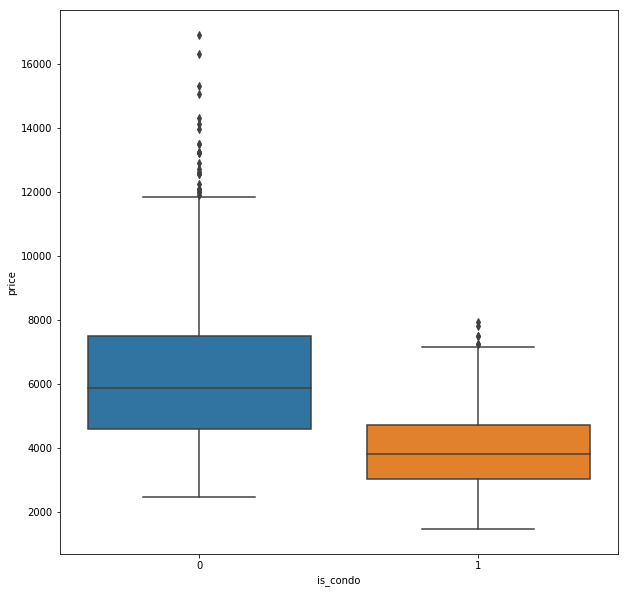

In [16]:
box('is_condo', 'price')

In [17]:
df.is_condo = pd.Categorical(df.is_condo)
df['is_condo'] = df.is_condo.cat.codes

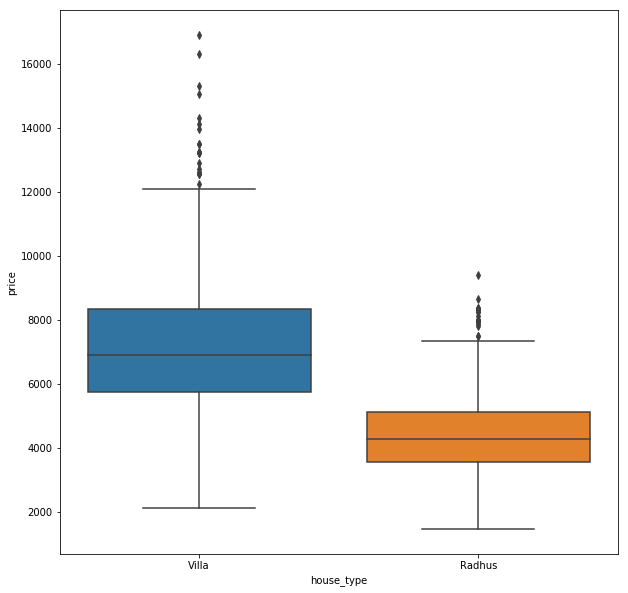

In [18]:
box('house_type', 'price')

In [19]:
df.house_type = pd.Categorical(df.house_type)
df['house_type'] = df.house_type.cat.codes

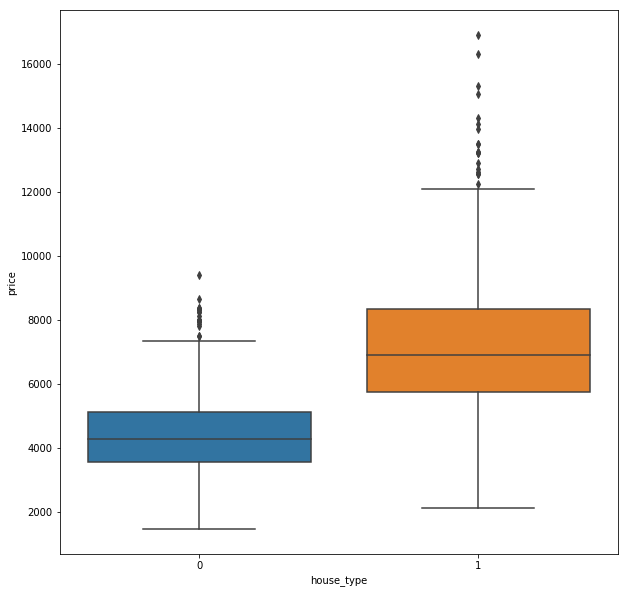

In [20]:
box('house_type', 'price')

# Date sold

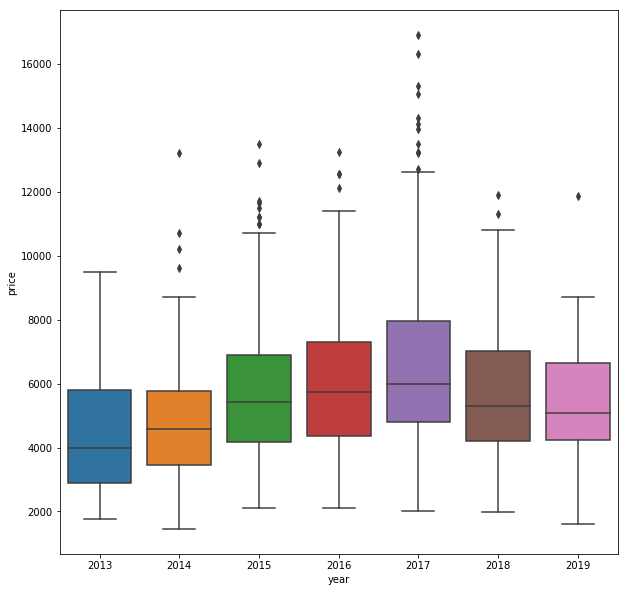

In [27]:
box('year', 'price')

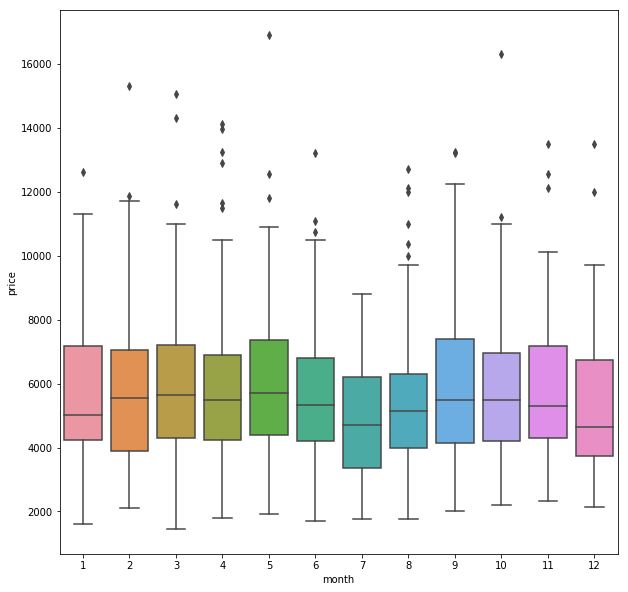

In [29]:
box('month', 'price')

In [43]:
def yoy(var):
    data_house = df[df.house_type == 1].groupby(['year'])
    data_house[var].mean().plot(kind='line', label='Villa')
    data_townhome = df[df.house_type == 0].groupby(['year'])
    data_townhome[var].mean().plot(kind='line', label='Radhus')
    plt.legend()
    plt.show()

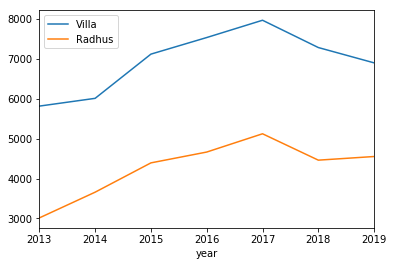

In [44]:
yoy('price')

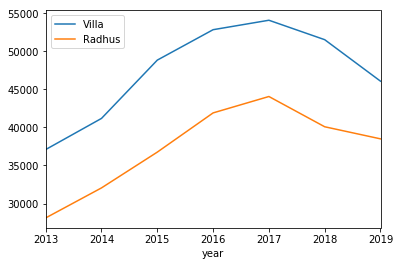

In [45]:
yoy('price_per_sqm')

In [52]:
def mom(var, min_month = 0, title=''):
    df['cont_month'] = df.apply(lambda row: (row['year']-2013)*12 + row['month'], axis=1)
    df_mom_house = df[(df.house_type == 1)  & (df.cont_month >= min_month)].groupby(['cont_month'])
    df_mom_house[var].mean().plot(kind='line', label='Villa')
    df_mom_townhome = df[(df.house_type == 0) & (df.cont_month >= min_month)].groupby(['cont_month'])
    df_mom_townhome[var].mean().plot(kind='line', label='Radhus')
    plt.legend()
    plt.title(title)
    plt.show()

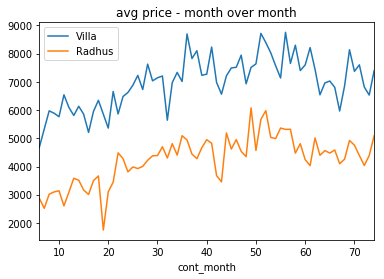

In [53]:
mom('price', 0, 'avg price - month over month')

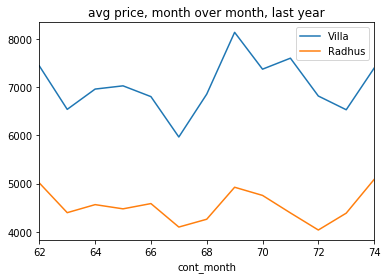

In [54]:
mom('price', 62, 'avg price, month over month, last year')

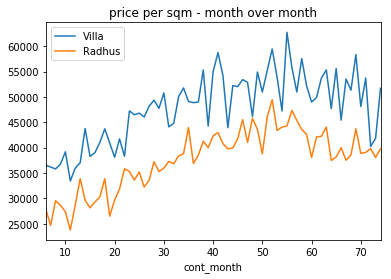

In [57]:
mom('price_per_sqm', 0, 'price per sqm - month over month')

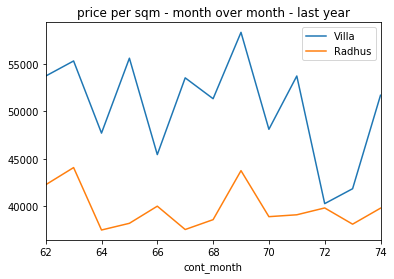

In [58]:
mom('price_per_sqm', 62, 'price per sqm - month over month - last year')

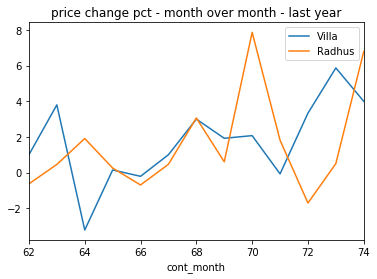

In [59]:
mom('price_change_pct', 62, 'price change pct - month over month - last year')

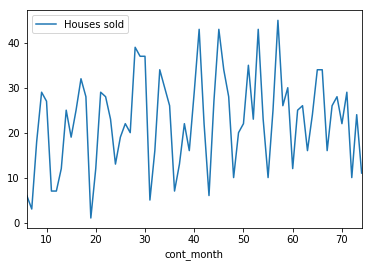

In [24]:
df.groupby(['cont_month'])['price'].count().plot(kind='line', label='Houses sold')
plt.legend()
plt.show()

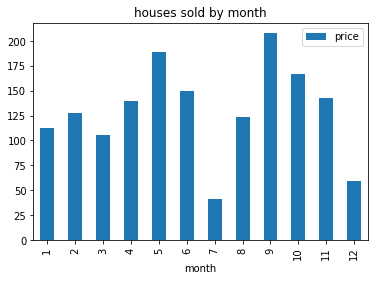

In [60]:
df.groupby(['month'])['price'].count().plot(kind='bar')
plt.legend()
plt.title('houses sold by month')
plt.show()

# Region

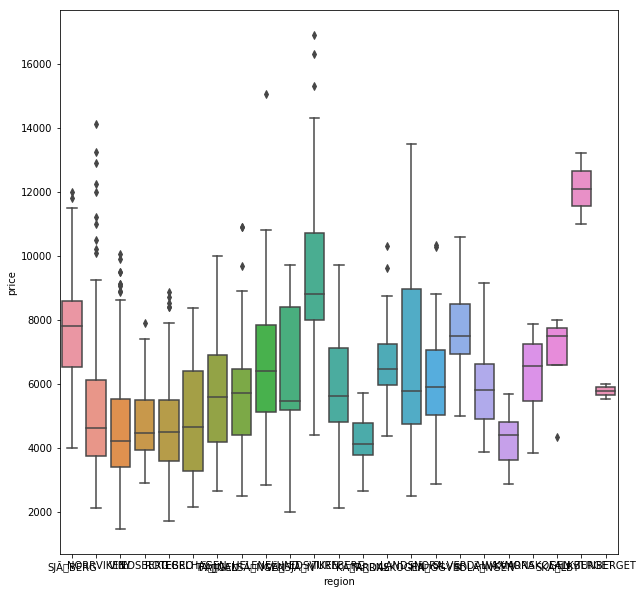

In [36]:
box('region', 'price')

In [37]:
df_by_region_count = df.groupby(['region'])['price'].agg(['mean', 'count']).sort_values(by=['mean'], ascending=False)
df_by_region_count

,mean,count
region,,
FALKBERGET,12100.000000,2
EDSVIKEN,9407.509548,93
SJÃBERG,7794.042553,47
SILVERDAL,7778.363636,55
SKÃLBY,6830.000000,4
LANDSNORA,6732.078947,38
TÃRNSKOGEN,6558.255814,43
HELENELUND,6493.495146,103
VÃSJÃN,6412.750000,20


In [38]:
df.region = pd.Categorical(df.region)
#df['region'] = df.region.cat.codes

# Broker

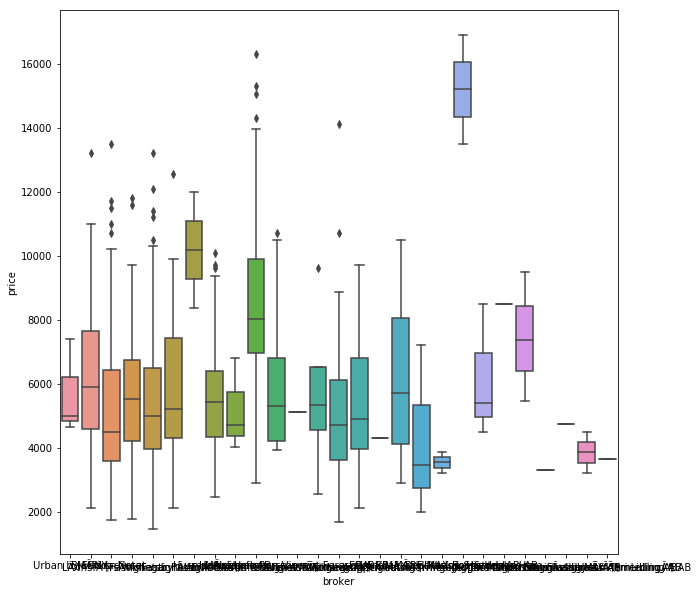

In [39]:
box('broker', 'price')

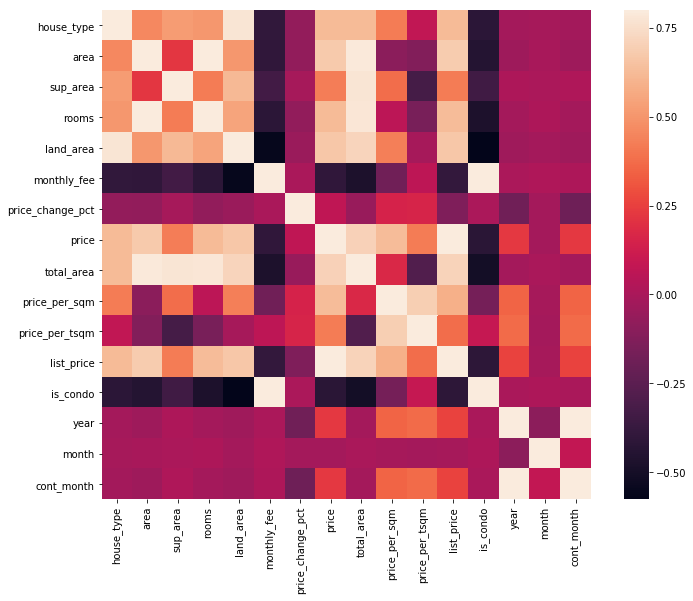

In [40]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [47]:
df[df.year==2018].price_change_pct4

<bound method IndexOpsMixin.value_counts of 2      -3.0
3      -2.0
4      13.0
5      -1.0
6      -5.0
7       2.0
8      10.0
9      15.0
10     -5.0
11     -6.0
12     -7.0
13      2.0
14      0.0
15     -5.0
16      2.0
17     10.0
18      4.0
19      0.0
20     -2.0
21      8.0
22    -11.0
23      2.0
24     -1.0
25      6.0
26      4.0
27     -5.0
28      1.0
29      0.0
30      6.0
31      0.0
       ... 
262     0.0
263    -1.0
264    13.0
265     1.0
266    -4.0
267    -3.0
268     0.0
269    -2.0
270    -6.0
271     0.0
272    13.0
273    -7.0
274    -5.0
275     0.0
276     0.0
277   -10.0
278     0.0
279     0.0
280     0.0
281     2.0
282     8.0
283     6.0
284     4.0
285    -2.0
286    -5.0
287     0.0
288    -1.0
289     4.0
290     0.0
291   -14.0
Name: price_change_pct, Length: 290, dtype: float64>